# 데이터 로드

In [1]:
!pip install konlpy

In [2]:
# 필요 프레임워크 및 라이브러리 준비
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import re
import urllib.request
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
# 사전에 정제+정규화된 훈련용 통합 데이터 로드
total_data = pd.read_table('clean_total_data(movie&shopping&game).txt')

In [4]:
print(len(total_data))
print(total_data[:5])

489016
                                            document  label
0                                        이유식 냄비로 좋아요      1
1                                       한글화가 없어서짜징난다      0
2  에휴 존나 뚝 뚝 끊키는대뭘게임을하라고 무슨 핑은좋은대 게임만들어가면 뚝뚝 끊키고 ...      0
3                           이런 영화는 불륜남녀들만 보러가라거 만든거냐      0
4  아파트  가위 여자 단어로 찾았습니다국민학생 때 본 것 같은데 토요명화 딴따따따따 ...      1


# 토큰+워드임베딩된 단어집합 파일 로드

In [5]:
# 불용어 정의된 파일 로드 711개
import os
data =  open('sentiment_stopwords_v0.2.txt', 'r', encoding='utf-8')
stopwords = []
for line in data :
    line.rstrip()
    stopwords.append(line.replace("\t\n", ""))
print(len(stopwords))
print(stopwords)

772
['아', '휴', '아이구', '아이쿠', '아이고', '어', '나', '우리', '저희', '따라', '의해', '을', '를', '에', '의', '가', '으로', '로', '에게', '뿐이다', '의거하여', '근거하여', '입각하여', '기준으로', '예하면', '예를들면', '예를들자면', '저', '소인', '소생', '지말고', '하지마', '하지마라', '다른', '물론', '또한', '그리고', '비길수없다', '해서는안된다', '뿐만아니라', '만이아니다', '만은아니다', '막론하고', '관계없이', '그치지않다', '그러나', '그런데', '하지만', '든간에', '논하지않다', '따지지않다', '설사', '비록', '더라도', '아니면', '만못하다', '하는편이낫다', '불문하고', '향하여', '향해서', '향하다', '쪽으로', '틈타', '이용하여', '타다', '오르다', '제외하고', '이외에', '이밖에', '하여야', '비로소', '한다면몰라도', '외에도', '이곳', '여기', '부터', '기점으로', '따라서', '할생각이다', '하려고하다', '이리하여', '그리하여', '그렇게함으로써', '일때', '할때', '앞에서', '중에서', '보는데서', '으로써', '로써', '까지', '해야한다', '일것이다', '반드시', '할줄알다', '할수있다', '할수있어', '임에틀림없다', '한다면', '등', '등등', '제', '겨우', '단지', '다만', '할뿐', '딩동', '댕그', '대해서', '대하여', '대하면', '훨씬', '얼마나', '얼마만큼', '얼마큼', '남짓', '여', '얼마간', '약간', '다소', '좀', '조금', '다수', '몇', '얼마', '지만', '하물며', '그렇지만', '이외에도', '대해말하자면', '다음에', '반대로', '반대로말하자면', '이와반대로', '바꾸어서말하면', '바꾸어서한다면', '만약', '그렇지않으면', '까악', '툭', '딱', '삐걱

In [6]:
# 훈련용 토탈데이터셋(영화+쇼핑+게임) 토크나이징된 파일 로드
import json
with open('total_data(movie&shopping&game)_tokened_vocab.json') as json_file:
  tokened_vocab = json.load(json_file)
print(len(tokened_vocab))
print(tokened_vocab[:5])

489016
[['이유식', '냄비', '로', '좋다'], ['한글화', '없다', '짜다', '징', '난', '다'], ['휴', '존나', '뚝', '뚝', '끊다', '키', '대', '뭘', '게', '이다', '무슨', '핑', '좋다', '게임', '만', '들어가다', '뚝뚝', '끊다', '키', '고', '걸다', '괜찮다', '또', '총', '쏘다', '뚝뚝', '끊다', '키', '고', '해결', '법', '없다', '뭘', '게', '이다'], ['이렇다', '영화', '불륜', '남녀', '만', '보다', '라거', '만들다'], ['아파트', '가위', '여자', '단어', '로', '찾다', '국민', '학생', '때', '보다', '것', '같다', '토요명화', '딴', '따따', '따따', '띠리리', '그', '때', '보다', '게', '아직', '기억', '남다', '그냥', '충격', '이다', '문득', '그', '영화', '생각나다', '제목', '을', '드디어', '찾다', '근데', '영화', '없다']]


In [7]:
# 토크나이징된 훈련데이터에서 불용어 제거
X_total = []
for sentence in tokened_vocab:
  temp_X = [word for word in sentence if not word in stopwords]
  X_total.append(temp_X)

In [8]:
print(len(X_total))
print(X_total[:5])

489016
[['이유식', '냄비', '좋다'], ['한글화', '없다', '짜다', '징'], ['존나', '뚝', '뚝', '끊다', '키', '대', '뭘', '핑', '좋다', '들어가다', '끊다', '키', '걸다', '괜찮다', '총', '쏘다', '끊다', '키', '해결', '법', '없다', '뭘'], ['이렇다', '불륜', '남녀', '라거', '만들다'], ['아파트', '가위', '단어', '찾다', '국민', '학생', '토요명화', '딴', '따따', '따따', '띠리리', '아직', '기억', '남다', '그냥', '충격', '문득', '생각나다', '제목', '드디어', '찾다', '근데', '없다']]


In [9]:
# 토큰화가 오래걸리므로, 반복작업이 용이하도록 파일로 추출해두자
tokened_vocab = X_total
import json
json = json.dumps(tokened_vocab, ensure_ascii=False)
vacab = open("total_data(movie&shopping&game)_tokened_vocab_v0.4.json", "w", encoding="utf-8")
vacab.write(json)
vacab.close()

# 정수 인코딩

In [10]:
# 기계가 텍스트를 숫자로 처리할 수 있도록 데이터를 정수로 변환
# 일단 단어 집합을 만들자
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_total)
 # fit_on_texts()안에 코퍼스를 입력으로 하면 빈도수를 기준으로 단어 집합을 생성한다.
 # 단어 빈도수가 높은순으로 낮은 정수 인덱스 부여

In [11]:
# indexed_vocab(vocab) 저장
indexed_vocab = tokenizer.word_index
import json
json = json.dumps(indexed_vocab, ensure_ascii=False)
vacab = open("total_data(movie&shopping&game)_indexed_vocab.v0.4.json", "w", encoding="utf-8")
vacab.write(json)
vacab.close()

In [12]:
print(len(tokenizer.word_index))
print(tokenizer.word_index)
print(tokenizer.word_counts)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [17]:
# 등장 빈도수가 낮은 데이터를 처리해보자
# 특정 횟수 이하 단어의 비중이 몇인지 체크
threshold = 16
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 85383
등장 빈도가 15번 이하인 희귀 단어의 수: 71345
단어 집합에서 희귀 단어의 비율: 83.55878804914327
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 4.843989969479073


In [18]:
# 전체 단어 개수 중 빈도수 22이하인 단어는 제거.
# 0번 패딩 토큰을 고려하여 + 1
vocab_size = total_cnt - rare_cnt + 1
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 14039


In [19]:
# 단어집합을 케라스 토크나이저의 인자로 넘겨주면, 케라스 토크나이저는 텍스트 시퀀스를 숫자 시퀀스로 변환
#Tokenizer메서드에 숫자를 입력하면 빈도수가 높은 상위 몇개 단어만 사용
tokenizer = Tokenizer(num_words = vocab_size +2, oov_token ='OOV')
# 빈도수 상위 vocab_size단어만 사용, 숫자 0과 OOV를 고려해서 단어 집합의 크기는 +2
tokenizer.fit_on_texts(X_total)
# 여기까지는 보캡길이가 적용안된 것처럼 보임, 실제 적용은 text_to_sequences사용시 적용됨
X_total = tokenizer.texts_to_sequences(X_total)

# vocab_size로 지정한 단어만 보존하고 싶을 때, 굳이 안해도됨
# words_frequency = [w for w,c in tokenizer.word_index.items() if c >= vocab_size + 1] # 인덱스가 5 초과인 단어 제거
# for w in words_frequency:
#     del tokenizer.word_index[w] # 해당 단어에 대한 인덱스 정보를 삭제
#     del tokenizer.word_counts[w] # 해당 단어에 대한 카운트 정보를 삭제

# 정수인코딩 결과 확인
print(len(tokenizer.word_index))
print(tokenizer.word_index)
print(tokenizer.word_counts)

# 빈도수 상위 vocabsize개수의 단어는 2 ~ vocabsize+1까지의 인덱스를 가졌으며, 그 외 단어 집합에 없는 단어들은 전부 'OOV'의 인덱스인 1로 인코딩
# 케라스 토크나이저는 기본적으로 'OOV'의 인덱스를 1로 지정
# print('단어 OOV의 인덱스 : {}'.format(tokenizer.word_index['OOV']))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [20]:
y_total = np.array(total_data['label'])

# 빈 샘플(empty samples)제거

In [21]:
# 각 샘플의 길이가 0인 샘플들의 인덱스 확인
drop_total = [index for index, sentence in enumerate(X_total) if len(sentence) < 1]
print(drop_total)

[495, 626, 978, 1978, 2319, 2585, 3106, 3317, 3415, 4305, 4646, 4735, 6334, 6735, 7216, 8061, 8064, 8224, 8317, 8669, 8925, 9181, 9269, 9319, 9575, 9966, 10168, 10262, 10774, 11150, 11334, 11447, 11481, 11760, 11866, 12040, 12198, 12498, 12673, 12742, 13529, 14299, 14452, 14557, 14578, 14632, 14823, 15073, 15789, 15973, 16367, 17378, 17396, 17926, 17976, 18027, 18067, 18465, 18749, 19162, 19778, 20146, 20194, 20576, 21201, 21414, 21569, 22699, 22789, 22845, 22947, 22969, 23018, 23479, 23485, 23534, 23616, 23627, 23673, 24244, 24816, 24824, 25617, 26186, 26249, 26566, 26581, 26933, 27052, 27170, 27703, 27718, 28289, 28661, 28748, 29080, 29275, 29293, 29296, 30208, 30515, 31175, 31874, 31888, 32502, 32650, 32654, 32744, 32820, 32836, 33194, 33544, 33568, 33617, 33805, 33813, 34004, 34093, 34262, 34402, 34417, 34679, 35407, 35653, 35793, 35861, 35871, 35967, 36908, 37060, 37121, 37168, 37436, 38366, 38455, 38657, 38877, 39859, 40409, 40661, 41140, 41670, 42355, 42358, 42503, 42562, 42882,

In [22]:
# 빈 샘플들을 제거
X_total = np.delete(X_total, drop_total, axis=0)
y_total = np.delete(y_total, drop_total, axis=0)
print(len(X_total))
print(len(y_total))

487756
487756


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


# 패딩

리뷰의 최대 길이 : 67
리뷰의 평균 길이 : 8.193855124283454


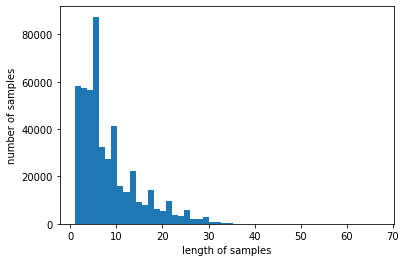

In [23]:
# 서로 다른 길이의 샘플들의 길이를 동일하게 맞춰는 작업
# 전체 데이터에서 가장 길이가 긴 리뷰와, 전체의 길이분포를 알아보자
print('리뷰의 최대 길이 :',max(len(l) for l in X_total))
print('리뷰의 평균 길이 :',sum(map(len, X_total))/len(X_total))
plt.hist([len(s) for s in X_total], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [24]:
# 최적의 길이를 찾기 위해, 전체 샘플중 길이가 max_len 이하인 샘플의 비율을 확인하는 함수 생성
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

In [27]:
# 비율 체크
max_len = 20
below_threshold_len(max_len, X_total)

전체 샘플 중 길이가 20 이하인 샘플의 비율: 93.38952263016755


In [28]:
# 짧은 데이터는 0을 채우고, 기준을 넘는 데이터는 손실됨
X_total = pad_sequences(X_total, maxlen = max_len)

# LSTM/GRU/BiLSTM 모델 훈련

In [29]:
# 필요한 프레임워크 및 라이브러리 임포트
from tensorflow.keras.layers import Embedding, Dense, GRU, LSTM, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [30]:
# 임베딩 벡터의 차원은 100으로, 리뷰분류를 위해 LSTM 사용
# 왜 100인지는 모름
model_LSTM = Sequential()
model_LSTM.add(Embedding(vocab_size+2, 100))
model_LSTM.add(LSTM(128))
model_LSTM.add(Dense(1, activation='sigmoid'))

In [31]:
model_GRU = Sequential()
model_GRU.add(Embedding(vocab_size+2, 100))
model_GRU.add(GRU(128))
model_GRU.add(Dense(1, activation='sigmoid'))

In [32]:
model_BiLSTM = Sequential()
model_BiLSTM.add(Embedding(vocab_size+2, 100))
model_BiLSTM.add(Bidirectional(LSTM(128)))
model_BiLSTM.add(Dense(1, activation='sigmoid'))

In [33]:
# 검증 데이터 손실이 4회 증가하면 학습 조기 종료
# model check point를 사용하여 검증 데이터의 정확도가 이전보다 좋아질 경우만 모델 저장
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc_LSTM = ModelCheckpoint('RNN_LSTM_KoNLPy(Okt)_Total(movie+shopping+game)_v0.4.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
mc_GRU = ModelCheckpoint('RNN_GRU_KoNLPy(Okt)_Total(movie+shopping+game)_v0.4.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
mc_BiLSTM = ModelCheckpoint('RNN_BiLSTM_KoNLPy(Okt)_Total(movie+shopping+game)_v0.4.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [34]:
# 필요한 매트릭 선언, AUC-ROC, F1-Score, AUC-PR 에 필요한 지표 모두 체크
import tensorflow as tf

ROCauc = tf.keras.metrics.AUC(curve="ROC") # auc_1
PRauc = tf.keras.metrics.AUC(curve="PR") # auc_2
RECALL = tf.keras.metrics.Recall()
PRECISION = tf.keras.metrics.Precision()
TP = tf.keras.metrics.TruePositives()
TN = tf.keras.metrics.TrueNegatives()
FP = tf.keras.metrics.FalsePositives()
FN = tf.keras.metrics.FalseNegatives()

In [35]:
# LSTM모델 훈련
model_LSTM.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc', ROCauc, PRauc, RECALL, PRECISION, TP, TN, FP, FN])
history = model_LSTM.fit(X_total, y_total, epochs=15, callbacks=[es, mc_LSTM], batch_size=100, validation_split=0.2)

Epoch 1/15
3903/3903 [==============================] - 55s 13ms/step - loss: 0.3868 - acc: 0.8276 - auc: 0.9070 - auc_1: 0.9042 - recall: 0.8178 - precision: 0.8339 - true_positives: 159383.0000 - true_negatives: 163563.0000 - false_positives: 31748.0000 - false_negatives: 35510.0000 - val_loss: 0.3631 - val_acc: 0.8401 - val_auc: 0.9198 - val_auc_1: 0.9177 - val_recall: 0.8082 - val_precision: 0.8637 - val_true_positives: 39466.0000 - val_true_negatives: 42492.0000 - val_false_positives: 6229.0000 - val_false_negatives: 9365.0000

Epoch 00001: val_acc improved from -inf to 0.84015, saving model to RNN_LSTM_KoNLPy(Okt)_Total(movie+shopping+game)_v0.4.h5
Epoch 2/15
3903/3903 [==============================] - 47s 12ms/step - loss: 0.3476 - acc: 0.8504 - auc: 0.9255 - auc_1: 0.9232 - recall: 0.8441 - precision: 0.8547 - true_positives: 164507.0000 - true_negatives: 167337.0000 - false_positives: 27974.0000 - false_negatives: 30386.0000 - val_loss: 0.3527 - val_acc: 0.8469 - val_auc: 0.9

In [36]:
# GRU모델 훈련
model_GRU.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc', ROCauc, PRauc, RECALL, PRECISION, TP, TN, FP, FN])
history = model_GRU.fit(X_total, y_total, epochs=15, callbacks=[es, mc_GRU], batch_size=100, validation_split=0.2)

Epoch 1/15
3903/3903 [==============================] - 52s 13ms/step - loss: 0.3840 - acc: 0.8294 - auc: 0.9109 - auc_1: 0.9082 - recall: 0.8268 - precision: 0.8358 - true_positives: 201499.0000 - true_negatives: 204449.0000 - false_positives: 39583.0000 - false_negatives: 42225.0000 - val_loss: 0.3638 - val_acc: 0.8393 - val_auc: 0.9191 - val_auc_1: 0.9174 - val_recall: 0.8652 - val_precision: 0.8230 - val_true_positives: 42247.0000 - val_true_negatives: 39633.0000 - val_false_positives: 9088.0000 - val_false_negatives: 6584.0000

Epoch 00001: val_acc improved from -inf to 0.83935, saving model to RNN_GRU_KoNLPy(Okt)_Total(movie+shopping+game)_v0.4.h5
Epoch 2/15
3903/3903 [==============================] - 47s 12ms/step - loss: 0.3458 - acc: 0.8509 - auc: 0.9263 - auc_1: 0.9240 - recall: 0.8459 - precision: 0.8542 - true_positives: 164866.0000 - true_negatives: 167172.0000 - false_positives: 28139.0000 - false_negatives: 30027.0000 - val_loss: 0.3532 - val_acc: 0.8470 - val_auc: 0.92

In [ ]:
# BiLSTM모델 훈련
model_BiLSTM.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc', ROCauc, PRauc, RECALL, PRECISION, TP, TN, FP, FN])
history = model_BiLSTM.fit(X_total, y_total, epochs=15, callbacks=[es, mc_BiLSTM], batch_size=100, validation_split=0.2)

Epoch 1/15
3903/3903 [==============================] - 63s 15ms/step - loss: 0.3877 - acc: 0.8270 - auc: 0.9085 - auc_1: 0.9052 - recall: 0.8265 - precision: 0.8320 - true_positives: 201450.0000 - true_negatives: 203362.0000 - false_positives: 40670.0000 - false_negatives: 42274.0000 - val_loss: 0.3643 - val_acc: 0.8402 - val_auc: 0.9180 - val_auc_1: 0.9162 - val_recall: 0.8359 - val_precision: 0.8434 - val_true_positives: 40819.0000 - val_true_negatives: 41144.0000 - val_false_positives: 7577.0000 - val_false_negatives: 8012.0000

Epoch 00001: val_acc improved from -inf to 0.84020, saving model to RNN_BiLSTM_KoNLPy(Okt)_Total(movie+shopping+game)_v0.4.h5
Epoch 2/15
3903/3903 [==============================] - 58s 15ms/step - loss: 0.3493 - acc: 0.8492 - auc: 0.9247 - auc_1: 0.9225 - recall: 0.8429 - precision: 0.8533 - true_positives: 164282.0000 - true_negatives: 167077.0000 - false_positives: 28234.0000 - false_negatives: 30611.0000 - val_loss: 0.3569 - val_acc: 0.8443 - val_auc: 0

# LSTM/GRU/BiLSTM 모델 성능평가

In [ ]:
# 평가용 토탈 데이터셋2(화장품+앱)

# 데이터 로드
total_data2 = pd.read_table('total_data(app&cosmetic).txt')

# 토크나이징
X_test_total2 = []
for sentence in total_data2['document']:
    temp_X2 = okt.morphs(sentence, stem=True)
    temp_X2 = [word for word in temp_X2 if not word in stopwords]
    X_test_total2.append(temp_X2)

# 워드 벡터화
tokenizer = Tokenizer(vocab_size)
tokenizer.fit_on_texts(X_test_total2)
X_test_total2 = tokenizer.texts_to_sequences(X_test_total2)

# 패딩
X_test_total2 = pad_sequences(X_test_total2, maxlen = max_len)

# 라벨데이터 포함
y_test_total2 = np.array(total_data2['label'])

In [ ]:
# LSTM모델 성능 평가 
loaded_model = load_model('RNN_LSTM_KoNLPy(Okt)_Total(movie+shopping+game)_v0.4.h5')
result = loaded_model.evaluate(X_test_total2, y_test_total2, batch_size=100)
print("\n LSTM 테스트 결과:",result)

In [ ]:
# GRU모델 성능 평가 
loaded_model = load_model('RNN_GRU_KoNLPy(Okt)_Total(movie+shopping+game)_v0.4.h5')
result = loaded_model.evaluate(X_test_total2, y_test_total2, batch_size=100)
print("\n GRU 테스트 결과:",result)

In [ ]:
# BiLSTM모델 성능 평가 
loaded_model = load_model('RNN_BiLSTM_KoNLPy(Okt)_Total(movie+shopping+game)_v0.4.h5')
result = loaded_model.evaluate(X_test_total2, y_test_total2, batch_size=100)
print("\n BiLSTM 테스트 결과:",result)